## 1. Preparing the data
### 1.1 Sniffing around the dataset (exploration)

- I opened the document in notebook and looked at the data to have general impression of the dataset.
- I found one value with minus in front, I just deleted the ‘-’ sign.
- I also found ‘NA’ value, which later I replaced with the mean value of the column
- I found that all values in ‘petal.width’ column are inside quote marks which gonna make them be read as strings.

In [1]:
import pandas as pd

In [2]:
irises = pd.read_csv("/home/bartek/Documents/ROCHE_zadanie/rochepolskajuniordatascience/Graduate - IRISES dataset (2019-06).csv", sep = '|', header = 0)

#### Looking at basic information on dataset.
There are no outliers, 
the column 'Species' has the same count for every category which gonna be predicted. 

In [3]:
irises.describe()

,Sepal.Length,Sepal.Width,Petal.Length
count,150.000000,149.000000,150.000000
mean,5.843333,3.061745,3.758000
std,0.828066,0.433963,1.765298
min,4.300000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.800000,3.000000,4.350000
75%,6.400000,3.300000,5.100000
max,7.900000,4.400000,6.900000


In [4]:
irises.groupby('Species').count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,49,50,50
virginica,50,50,50,50


#### Checking again which column needs data type to changed and which one has missing value

In [5]:
irises.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     149 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null object
Species         150 non-null object
dtypes: float64(3), object(2)
memory usage: 7.0+ KB


### 1.2 Preprocessing the data

#### Changing the 'Petal.Width' to float, so the model could use this column

In [6]:
irises['Petal.Width'] = irises['Petal.Width'].str.replace(',' , '.')


In [7]:
irises['Petal.Width'] = irises['Petal.Width'].astype(float)


#### Now I have data types ready to be used in model, but there is still missing value in one column

In [8]:
irises.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     149 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [9]:
irises.isnull().sum()

Sepal.Length    0
Sepal.Width     1
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

#### I filled the missing value with mean value from the column. The data is ready to be used in model.

In [10]:
irises['Sepal.Width'].fillna(irises['Sepal.Width'].mean(), inplace=True)

In [11]:
irises.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

## 2. Preparing the model
### 2.1 creating dependent and independent datasets

Species is the dependent value(y) the one that's gonna be predicted. The rest of values(X) are the independent which are the basis to predict the 'Species'.

In [12]:
X = irises.drop('Species',axis='columns')
y = irises.Species

In [13]:
from sklearn.model_selection import train_test_split


#### I split the data into training and testing sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

I decided to check the performance of the Random Forest Classifier as I know this model should perform well and fast on this small dataset.
Random forest is an ensemble method, a technique that combines the predictions from multiple algorithms together to make more accurate predictions than any individual model.

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model = RandomForestClassifier(n_estimators=10, random_state = 42)

### 2. 2 Training the model

In [26]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [27]:
y_predicted = model.predict(X_test)

#### The model performance

In [28]:
from sklearn.metrics import accuracy_score 
acc = accuracy_score(y_test, y_predicted)
print("acc: ", acc)

acc:  0.9333333333333333


I checked the performance with different numbers of estimators(trees).
The defualt is 10, I tried increasing the number up to 100, but it didn't change the performance of the model, so I left the deafualt number.
Reading the documentation for the RandomForestClassifier I found that 0 and 42 are the optimal values of 'random_state'.
I left the rest of features default as the model performed well.

#### The confusion matric shows model accuracy

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  6]])

Text(69.0, 0.5, 'Truth')

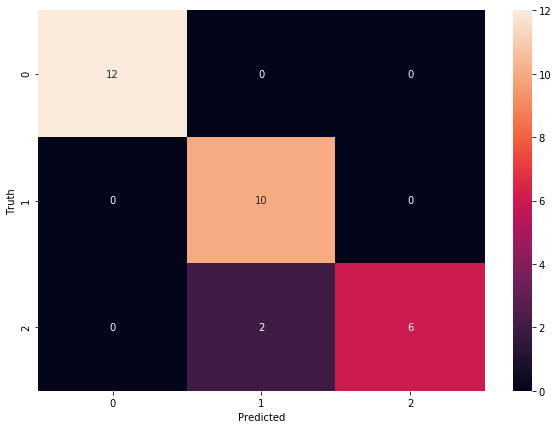

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
from sklearn import metrics

In [31]:
print(metrics.classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.83      0.91        12
   virginica       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.94        30

